In [1]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import norm

import GCExitPathwayModel as GCEPM
import ExtendedModel1 as EXTM1
import ExtendedModel2 as EXTM2
importlib.reload(GCEPM)
importlib.reload(EXTM1)
importlib.reload(EXTM2)

<module 'ExtendedModel2' from 'd:\\UvA\\bioinformatics\\cell-differentiation-in-affinity-maturation-of-the-germinal-center\\ExtendedModel2.py'>

## Basic GC-Exit Pathway Model: Heaviside & Bell curve signal

In [2]:
# "Default" model parameters as given in table S1 of the Martinez paper
mu_p = 1e-6
mu_b = 2
mu_r = 0.1

sigma_p = 9
sigma_b = 100
sigma_r = 2.6

k_p = 1
k_b = 1
k_r = 1

lam_p = 1
lam_b = 1
lam_r = 1

In [3]:
mu = np.array([mu_p, mu_b, mu_r])
sigma = np.array([sigma_p, sigma_b, sigma_r])
k = np.array([k_p, k_b, k_r])
lam = np.array([lam_p, lam_b, lam_r])

In [4]:
# Time steps
t = np.linspace(0, 100, 10000)

# Initial conditions
p0 = 0.0  # BLIMP1
b0 = 0.0  # BCL6
r0 = 0.0  # IRF4

y0 = np.array([p0, b0, r0])

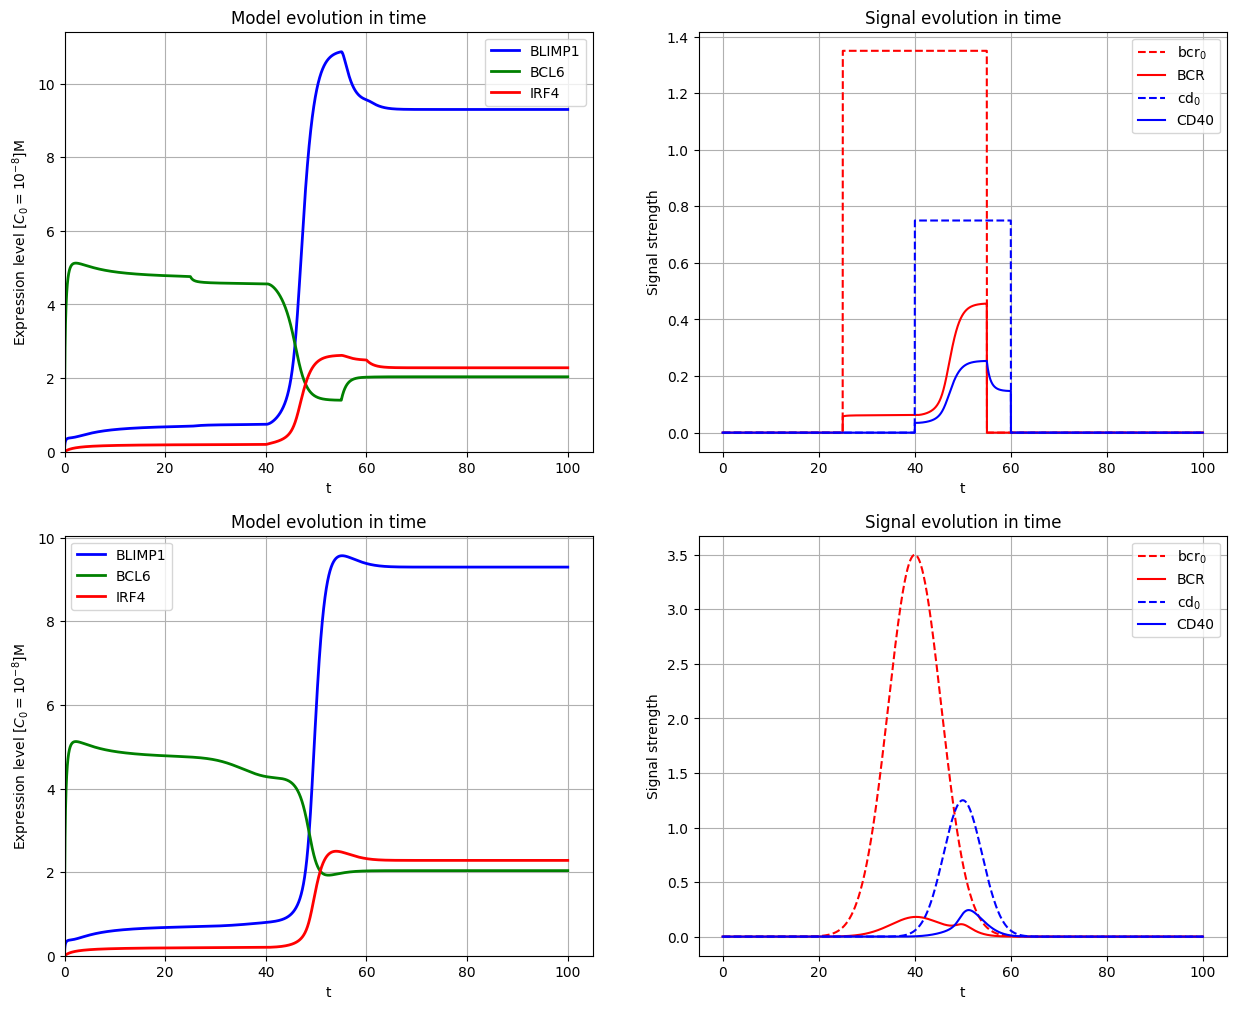

In [5]:
# Solutions and plotting
fig, ax = plt.subplots(2,2,figsize=(15,12))

# Heaviside signal
bcrt = lambda t : GCEPM.rectangle_signal(t, strength=1.35, tstart=25, tend=55)
cdt = lambda t : GCEPM.rectangle_signal(t, strength=0.75, tstart=40, tend=60)

sol = GCEPM.solve_model(y0, t, k, sigma, mu, lam, bcrt, cdt)

GCEPM.plot_model(ax[0,0], t, sol)
GCEPM.plot_singals(ax[0,1], t, sol, k_b, bcrt, cdt)

# Bell curve signal
bcrt = lambda t : GCEPM.bell_curve_signal(t, strength=3.5, loc=40, scale=5.5)
cdt = lambda t : GCEPM.bell_curve_signal(t, strength=1.25, loc=50, scale=4)

sol = GCEPM.solve_model(y0, t, k, sigma, mu, lam, bcrt, cdt)

GCEPM.plot_model(ax[1,0], t, sol)
GCEPM.plot_singals(ax[1,1], t, sol, k_b, bcrt, cdt)

## Extended Model 1: Visualization

In [6]:
# "Default" model parameters as given in table S1 of the Martinez paper
mu_p = 1e-6
mu_b = 2
mu_r = 0.1

sigma_p = 9
sigma_b = 100
sigma_r = 2.6

k_p = 1
k_b = 1
k_r = 1

lam_p = 1
lam_b = 1
lam_r = 1

# Extended model parameters
mu_x = 0.1
sigma_x = 5
k_x = 1
lam_x = 1

In [7]:
mu_basic = np.array([mu_p, mu_b, mu_r])
sigma_basic = np.array([sigma_p, sigma_b, sigma_r])
k_basic = np.array([k_p, k_b, k_r])
lam_basic = np.array([lam_p, lam_b, lam_r])

mu_extended = np.array([mu_p, mu_b, mu_r, mu_x])
sigma_extended = np.array([sigma_p, sigma_b, sigma_r, sigma_x])
k_extended = np.array([k_p, k_b, k_r, k_x])
lam_extended = np.array([lam_p, lam_b, lam_r, lam_x])

In [8]:
# Bell curve signal
bcrt = lambda t : GCEPM.bell_curve_signal(t, strength=30.0, loc=80, scale=1)
cdt = lambda t : GCEPM.bell_curve_signal(t, strength=10.0, loc=90, scale=1)

# Time steps
t = np.linspace(0, 150, 15000)

# Initial conditions
p0 = 0.0  # BLIMP1
b0 = 0.0  # BCL6
r0 = 0.0  # IRF4
x0 = 0.0  # PAX5

y0_basic = np.array([p0, b0, r0])
y0_extended = np.array([p0, b0, r0, x0])

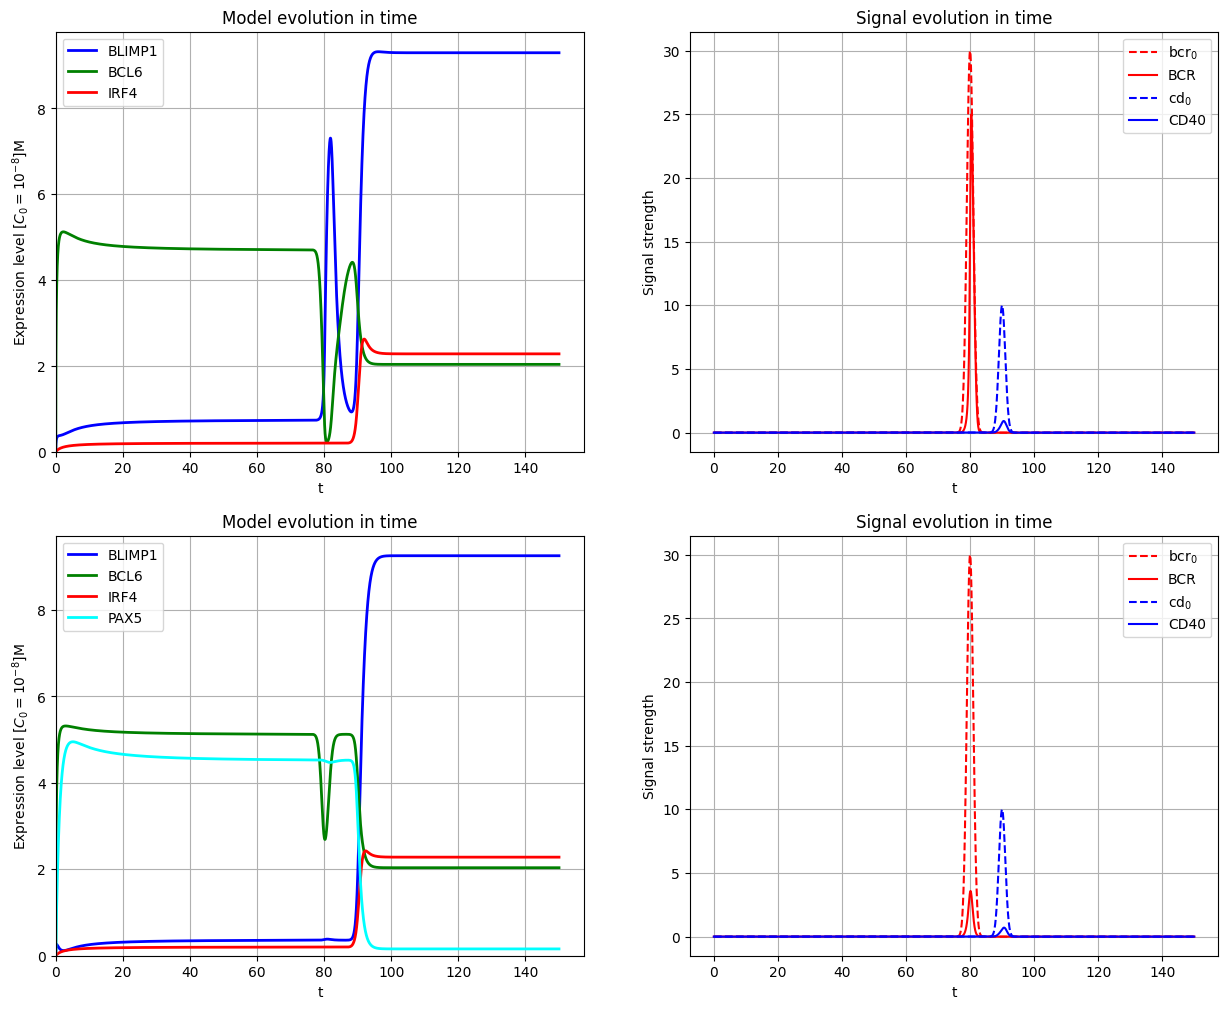

In [9]:
# Solutions and plotting
fig, ax = plt.subplots(2,2,figsize=(15,12))
sol_basic = GCEPM.solve_model(y0_basic, t, k_basic, sigma_basic, mu_basic, lam_basic, bcrt, cdt)

GCEPM.plot_model(ax[0,0], t, sol_basic)
GCEPM.plot_singals(ax[0,1], t, sol_basic, k_b, bcrt, cdt)

sol_extended = EXTM1.solve_model(y0_extended, t, k_extended, sigma_extended, mu_extended, lam_extended, bcrt, cdt)

EXTM1.plot_model(ax[1,0], t, sol_extended)
GCEPM.plot_singals(ax[1,1], t, sol_extended, k_b, bcrt, cdt)

I've changed the signals and made them much thinner, mostly because the variance of the bell curve is nowhere to be provided, so I assumed them to be normal. This yielded results closer to what can be found in the paper.

I made the signals much stronger, such that their final value (BCR, CD40) is closer to the 0-10 and 0-1 range correspondingly. The result was much more prevalent downregulation of BCL6 and upregulation of BLIMP1 when the BCR starts. 

Try BCR signal strength = 20.

## Extended Model 2: Visualization

In [10]:
# "Default" model parameters as given in table S1 of the Martinez paper
mu_p = 1e-6
mu_b = 2
mu_r = 0.1

sigma_p = 9
sigma_r = 2.6

k_p = 1
k_b = 1
k_r = 1

lam_p = 1
lam_b = 1
lam_r = 1

# Extended model parameters
mu_x = 1
sigma_x = 3
k_x = 1
lam_x = 1

sigma_b1 = 5
sigma_b2 = 100

In [11]:
mu_basic = np.array([mu_p, mu_b, mu_r])
sigma_basic = np.array([sigma_p, sigma_b, sigma_r])
k_basic = np.array([k_p, k_b, k_r])
lam_basic = np.array([lam_p, lam_b, lam_r])

mu_extended = np.array([mu_p, mu_b, mu_r, mu_x])
sigma_extended = np.array([sigma_p, sigma_b1, sigma_b2, sigma_r, sigma_x])
k_extended = np.array([k_p, k_b, k_r, k_x])
lam_extended = np.array([lam_p, lam_b, lam_r, lam_x])

In [12]:
# Bell curve signal
bcrt = lambda t : GCEPM.bell_curve_signal(t, strength=30.0, loc=80, scale=1)
cdt = lambda t : GCEPM.bell_curve_signal(t, strength=10.0, loc=90, scale=1)

# Time steps
t = np.linspace(0, 150, 15000)

# Initial conditions
p0 = 0.0  # BLIMP1
b0 = 0.0  # BCL6
r0 = 0.0  # IRF4
x0 = 0.0  # PAX5

y0_basic = np.array([p0, b0, r0])
y0_extended = np.array([p0, b0, r0, x0])

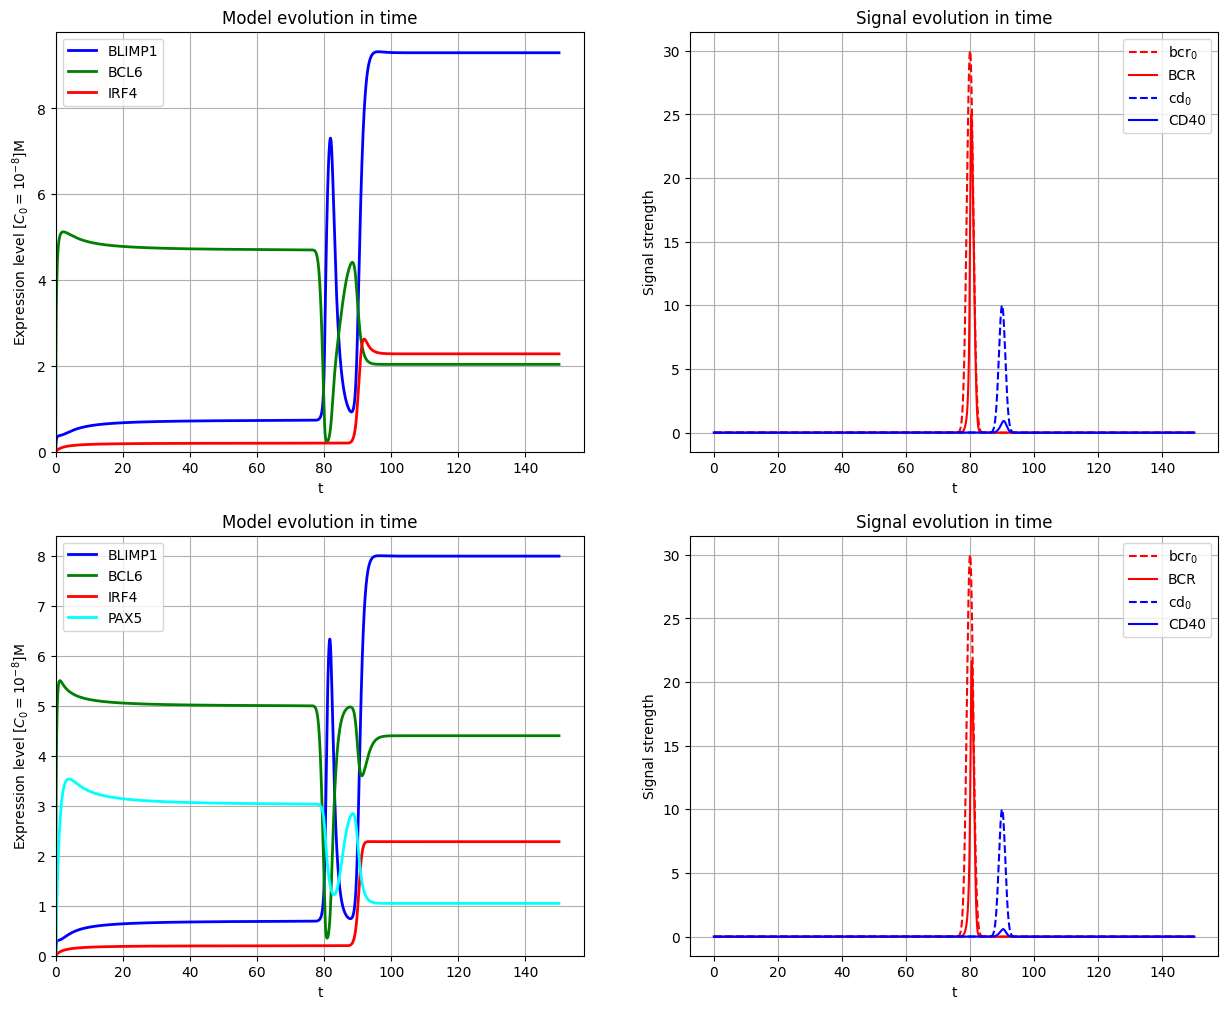

In [13]:
# Solutions and plotting
fig, ax = plt.subplots(2,2,figsize=(15,12))
sol_basic = GCEPM.solve_model(y0_basic, t, k_basic, sigma_basic, mu_basic, lam_basic, bcrt, cdt)

GCEPM.plot_model(ax[0,0], t, sol_basic)
GCEPM.plot_singals(ax[0,1], t, sol_basic, k_b, bcrt, cdt)

sol_extended = EXTM2.solve_model(y0_extended, t, k_extended, sigma_extended, mu_extended, lam_extended, bcrt, cdt)

EXTM2.plot_model(ax[1,0], t, sol_extended)
GCEPM.plot_singals(ax[1,1], t, sol_extended, k_b, bcrt, cdt)

The final result seems somewhat agreeable with the paper. In the end, BCL6 is downregulated, but at a higher level than in the baseline model. This is due to activation by PAX5. PAX5 itself is downregulated by the BLIMP1 during the "spike" phase. Spike flattening that can be observed in the paper is unfortunately not observed.

## BCR Subnetwork steady-state analysis

The dynamical equations of the baseline model are reduced to:

$$
\begin{align}
\text{BLIMP1}: \;\;\; & \frac{dp}{dt} = \mu_p + \sigma_p \frac{k_b^2}{k_b^2 + b^2} - \lambda_p p \\
\text{BCL6}: \;\;\; & \frac{db}{dt} = \mu_{b} + \sigma_{b} \frac{k_p^2}{k_p^2 + p^2} \cdot \frac{k_b^2}{k_b^2 + b^2} - (\lambda_b + bcr_0 \frac{k_b^2}{k_b^2 + b^2}) b \\
\end{align}
$$

Setting both $\frac{dp}{dt}, \frac{db}{dt}$ to $0$ and rewriting $p$ (BLIMP1) in terms of $b$ (BCL6) yields nullclines as below. We substitute a constant value for $bcr_0$.

$$
\begin{align}
p(b) \mid_{\frac{dp}{dt} = 0} &= \frac{\mu_p + \sigma_p \frac{k_b^2}{k_b^2 + b^2}}{\lambda_p} \\
p(b) \mid_{\frac{db}{dt} = 0} &= \sqrt{\frac{\sigma_b k_p^2 k_b^2}{(k_b^2 + b^2) \left[ (\lambda_b + bcr_0 \frac{k_b^2}{k_b^2 + b^2}) b - \mu_b\right]} - k_p^2} = \\
\end{align}
$$

In [57]:
# BLIMP1 nullcline as given in the equation above
def dpdt_nullcline(b, kb, mp, sp, lp):
    return (mp + sp * ((kb**2) / (kb**2 + b**2))) / lp

# BCL6 nullcline as given in the equation above
def dbdt_nullcline(b,  kb, kp, mb, sb, lb, bcr0):
    BCR = bcr0 * ((kb**2) / (kb**2 + b**2))
    return np.sqrt((sb * kp**2 * kb**2) / ((kb**2 + b**2)*((lb + BCR)*b - mb)) - kp**2)

C:\Users\User23718901\AppData\Local\Temp\ipykernel_12652\1354579563.py:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((sb * kp**2 * kb**2) / ((kb**2 + b**2)*((lb + BCR)*b - mb)) - kp**2)


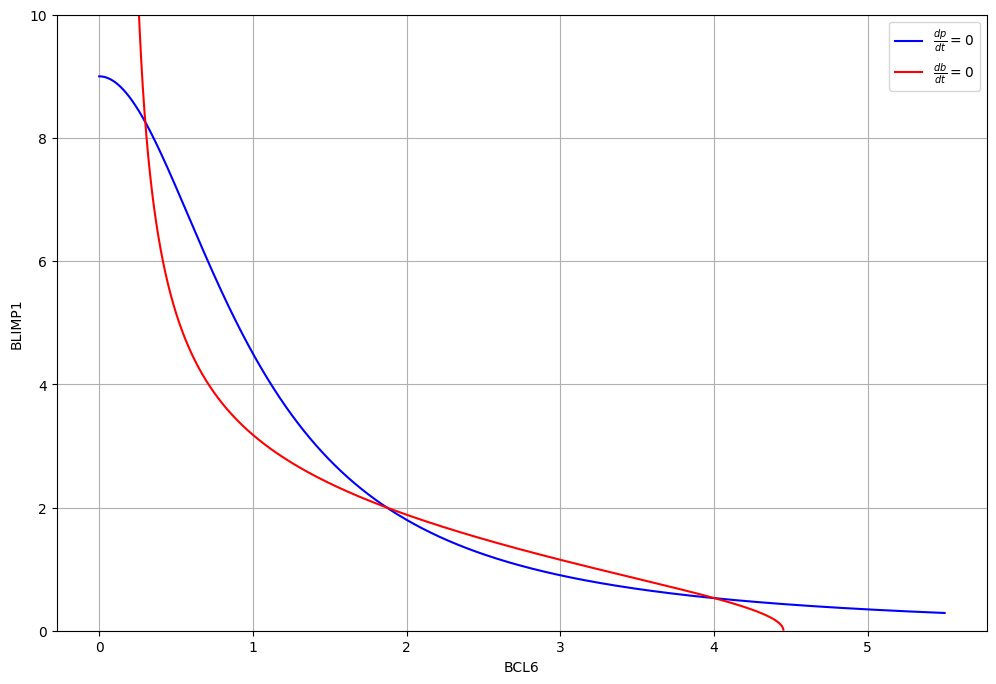

In [58]:
bs = np.linspace(0, 5.5, 10000)

# "Default" model parameters as given in table S1 of the Martinez paper
mu_p = 1e-6
mu_b = 2

sigma_p = 9
sigma_b = 100

k_p = 1
k_b = 1

lam_p = 1
lam_b = 1

fig, ax = plt.subplots(1,1,figsize=(12,8))

dpdt = dpdt_nullcline(bs, k_b, mu_p, sigma_p, lam_p)
dbdt = dbdt_nullcline(bs, k_b, k_p, mu_b, sigma_b, lam_b, 11)

ax.plot(bs, dpdt, color="blue", label=r"$\frac{dp}{dt} = 0$")
ax.plot(bs, dbdt, color="red", label=r"$\frac{db}{dt} = 0$")

ax.set_xlabel("BCL6")
ax.set_ylabel("BLIMP1")
ax.set_ylim(0, 10)
# ax.set_xlim(0, 3)
ax.grid()
ax.legend()

plt.show()

## Parameter estimation

We are given (2 x 3) dataset (two of them, actually) for steady-state genetic expressions of $p, b, r$ (BLIMP1, BCL6, IRF4) of plasma-cells and GC B-cells. There are too many parameters to estimate for too little data points, so some of the parameters are set to $1$ through unit manipulation (all $k$ s and $\lambda$ s). Steady-state means we set equations $S1, S2, S3$ all to $0$. For plasma-cells, there is no BCR and CD40 signalling anymore, so we can make the following assumption:

$$ BCR  = 0 \;\; \land \;\; CD40 = 0 $$

Plugging all this information in for plasma-cells yields:

$$
\begin{align*}
    \frac{dp}{dt} &= \mu_p + \sigma_p \frac{1}{1 + b^2} + \sigma_p \frac{r^2}{1 + r^2} - p = 0 \\
    \frac{db}{dt} &= \mu_b + \sigma_b \frac{1}{1 + p^2} \cdot \frac{1}{1 + b^2} \cdot \frac{1}{1 + r^2} - b = 0 \\
    \frac{dr}{dt} &= \mu_r + \sigma_r \frac{r^2}{1 + r^2} - r = 0 \\
\end{align*}
$$